In [1]:
# SQL Engine
import sqlalchemy as sa

db_path = r"C:\Users\rober\Documents\Python\bitcoin_gold_analysis\data\bitcoin_gold_database.db"
engine = sa.create_engine(f'sqlite:///{db_path}')

inspector = sa.inspect(engine)
print(f"Tables found: {inspector.get_table_names()}")

Tables found: ['macro_data', 'market_data_filled', 'market_data_sycned']


In [2]:
columns = inspector.get_columns('market_data_filled')
columns

[{'name': 'Date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'BTC',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'DXY',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'Gold',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'SP500',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'Yield_10Y',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'VIX',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'BTC_norm',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'DXY_norm',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'Gold_norm',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'SP50

In [3]:
import pandas as pd

query = """
SELECT 
    Date,  
    SP500,
    SP500_norm,
    BTC, 
    BTC_norm,
    Gold, 
    Gold_norm
FROM market_data_filled
WHERE SP500 IS NOT NULL
ORDER BY Date ASC
"""

df = pd.read_sql(query, engine)
df['Date'] = pd.to_datetime(df['Date'])
df.head() 

,Date,SP500,SP500_norm,BTC,BTC_norm,Gold,Gold_norm
0,2016-01-01,2012.660034,100.000000,434.334015,100.000000,1075.099976,100.000000
1,2016-01-02,2012.660034,100.000000,433.437988,99.793701,1075.099976,100.000000
2,2016-01-03,2012.660034,100.000000,430.010986,99.004676,1075.099976,100.000000
3,2016-01-04,2012.660034,100.000000,433.091003,99.713812,1075.099976,100.000000
4,2016-01-05,2016.709961,100.201223,431.959991,99.453411,1078.400024,100.306953


In [4]:
print(df.describe())

                                Date        SP500   SP500_norm            BTC  \
count                           3652  3652.000000  3652.000000    3652.000000   
mean   2020-12-30 12:00:00.000000256  3770.123121   187.320415   30256.581787   
min              2016-01-01 00:00:00  1829.079956    90.878734     364.330994   
25%              2018-07-01 18:00:00  2711.667480   134.730527    6415.053711   
50%              2020-12-30 12:00:00  3674.840088   182.586230   17129.605469   
75%              2023-07-01 06:00:00  4514.269897   224.293712   46446.924805   
max              2025-12-30 00:00:00  6932.049805   344.422291  124752.531250   
std                              NaN  1292.049813    64.196128   32057.185621   

           BTC_norm         Gold    Gold_norm  
count   3652.000000  3652.000000  3652.000000  
mean    6966.201299  1830.436718   170.257349  
min       83.882676  1073.900024    99.888387  
25%     1476.986257  1298.549957   120.784112  
50%     3943.878416  1757.3499

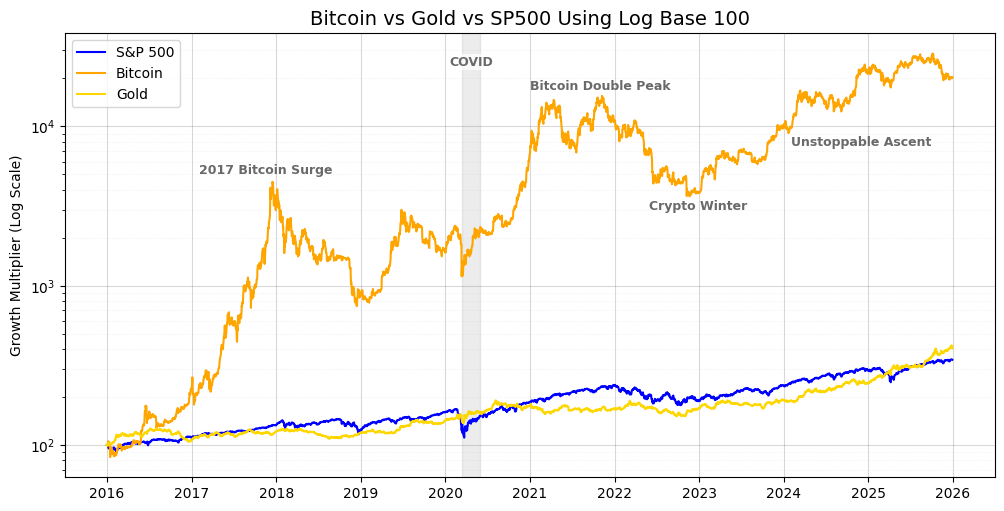

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(12, 6))
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Using Normalized columns created using Base-100
plt.plot(df['Date'], df['SP500_norm'], label='S&P 500', color='blue')
plt.plot(df['Date'], df['BTC_norm'], label='Bitcoin', color='orange') 
plt.plot(df['Date'], df['Gold_norm'], label='Gold', color='gold')

# Using Log Scale
plt.yscale('log')

# Titles and Labels
plt.title('Bitcoin vs Gold vs SP500 Using Log Base 100', fontsize=14)
plt.ylabel('Growth Multiplier (Log Scale)')
plt.grid(True, which="major", color='gray', linestyle='-', alpha=0.3)
plt.grid(True, which="minor", color='gray', linestyle=':', alpha=0.1)

### Annotations ###

# Bitcoin Surge
plt.annotate('2017 Bitcoin Surge', 
             xy=(pd.Timestamp('2017-12-17'), 25000), 
             xytext=(pd.Timestamp('2017-02-01'), 5000), 
             fontsize=9, 
             color='dimgray',
             fontweight='bold')

# COVID 
start_date = pd.Timestamp('2020-03-12')
end_date = pd.Timestamp('2020-06-01')

plt.axvspan(start_date, end_date, color='gray', alpha=0.15)
mid_date = start_date + (end_date - start_date) / 2

plt.text(mid_date, 0.95, "COVID", 
         transform=plt.gca().get_xaxis_transform(), 
         ha='center', va='top', 
         color='dimgray', fontsize=9, fontweight='bold',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Bitcoin Double Peak 
plt.annotate('Bitcoin Double Peak', 
             xy=(pd.Timestamp('2021-01-01'), 5000), 
             xytext=(pd.Timestamp('2021-01-01'), 17000), 
             fontsize=9, 
             color='dimgray',
             fontweight='bold')

# Crypto Winter 
plt.annotate('Crypto Winter', 
             xy=(pd.Timestamp('2022-06-01'), 5000), 
             xytext=(pd.Timestamp('2022-06-01'), 3000), 
             fontsize=9, 
             color='dimgray',
             fontweight='bold')

# Unstoppable Ascent  
plt.annotate('Unstoppable Ascent', 
             xy=(pd.Timestamp('2024-02-01'), 5000), 
             xytext=(pd.Timestamp('2024-02-01'), 7500), 
             fontsize=9, 
             color='dimgray',
             fontweight='bold')

plt.subplots_adjust(top=0.85)
plt.legend()
plt.show()

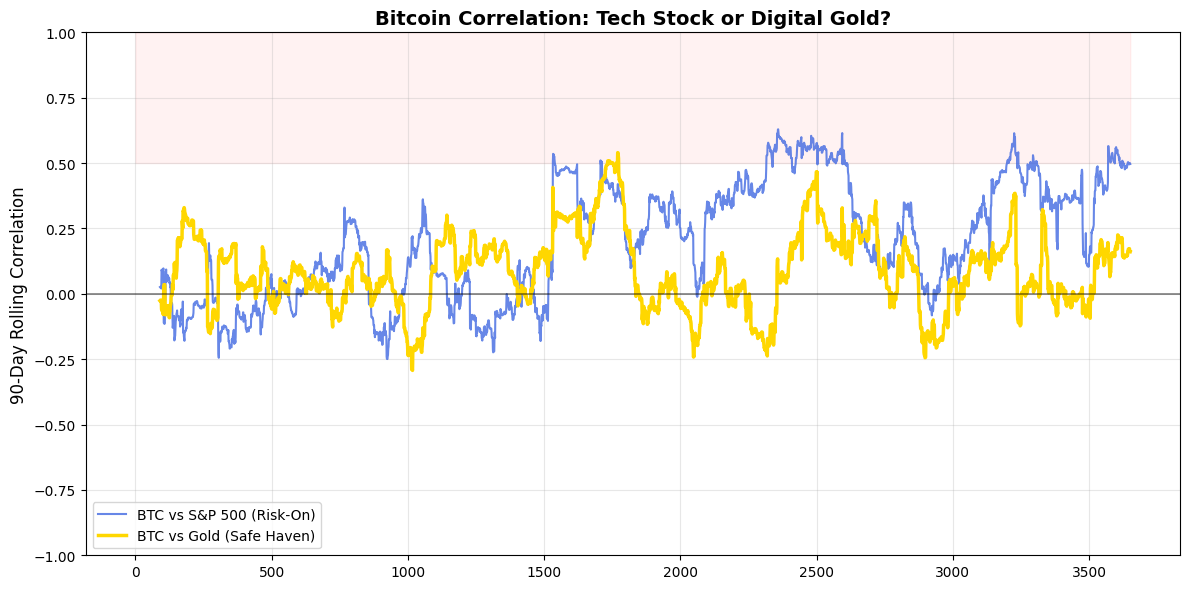

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate Daily Log Returns
df['BTC_Ret'] = np.log(df['BTC'] / df['BTC'].shift(1))
df['SP500_Ret'] = np.log(df['SP500'] / df['SP500'].shift(1))
df['Gold_Ret'] = np.log(df['Gold'] / df['Gold'].shift(1))

# Calculate 90-Day Rolling Correlations
corr_stocks = df['BTC_Ret'].rolling(90).corr(df['SP500_Ret'])
corr_gold = df['BTC_Ret'].rolling(90).corr(df['Gold_Ret'])

# Create Plot
plt.figure(figsize=(12, 6))

# Plot Relationship 
plt.plot(corr_stocks.index, corr_stocks, color='royalblue', alpha=0.8, label='BTC vs S&P 500 (Risk-On)')
plt.plot(corr_gold.index, corr_gold, color='gold', lw=2.5, label='BTC vs Gold (Safe Haven)')

# Add Zero Line
plt.axhline(0, color='black', lw=1.2, alpha=0.5)

# Formatting 'Safe Haven' zones
plt.ylim(-1, 1) 
plt.ylabel('90-Day Rolling Correlation', fontsize=12)
plt.title('Bitcoin Correlation: Tech Stock or Digital Gold?', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='lower left')

# Highlight High Correlation
plt.fill_between(corr_stocks.index, 0.5, 1.0, color='red', alpha=0.05, label='High Equity Correlation')

plt.tight_layout()
plt.show()